/home/vedant/miniconda3/lib/python3.12/site-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


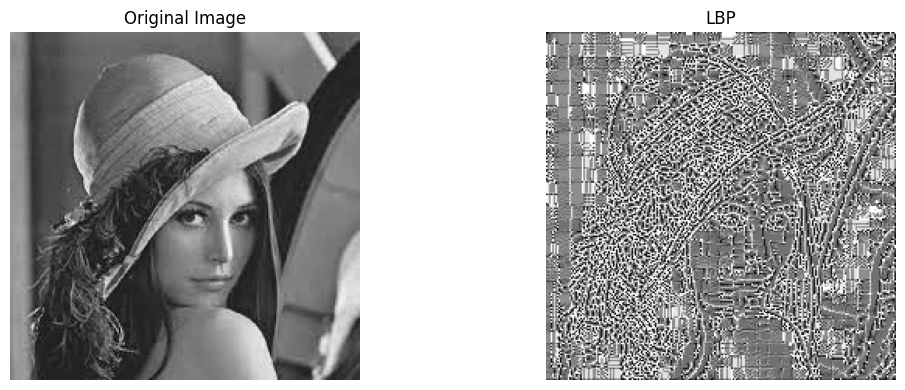

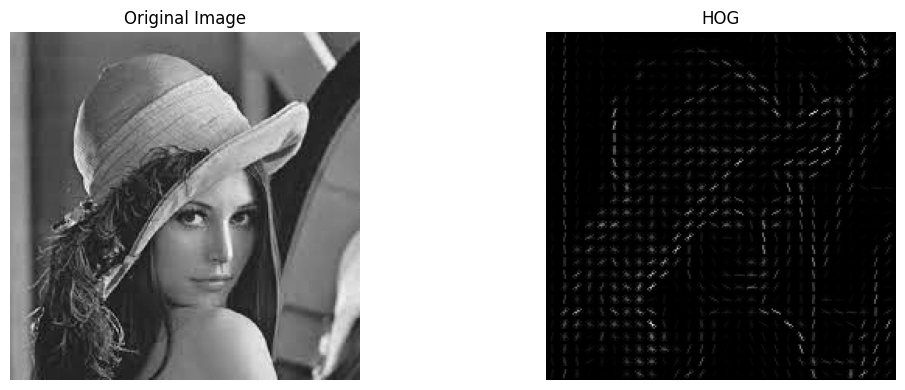

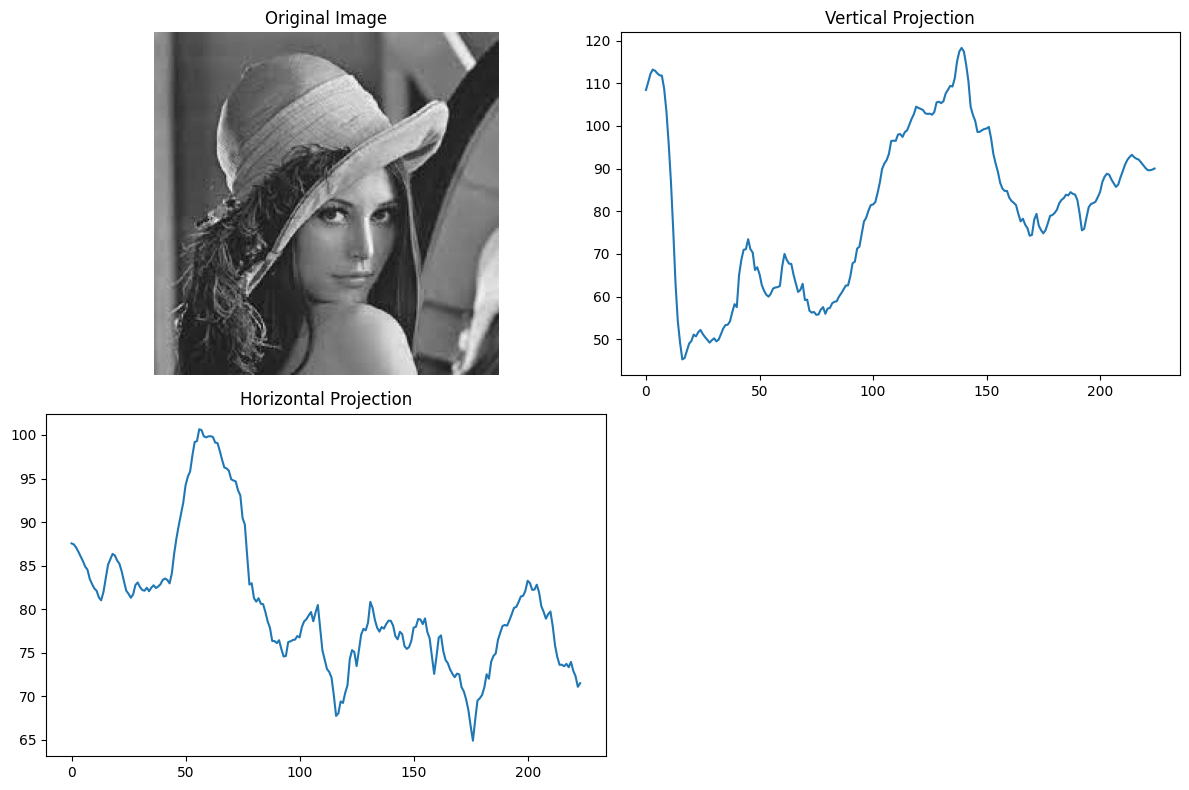

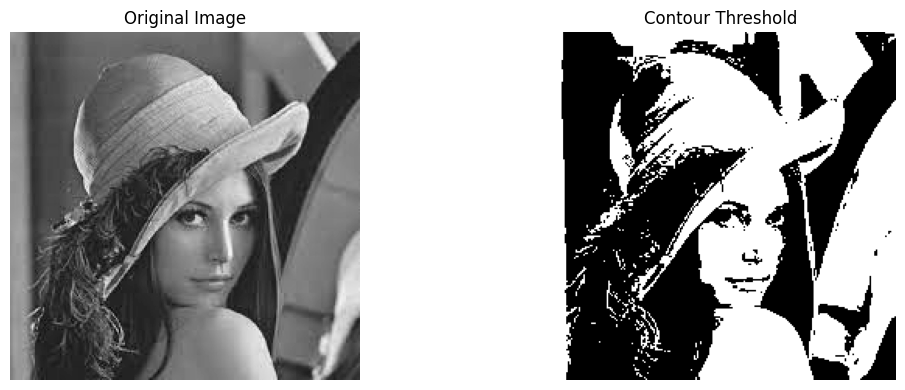

Total number of features: 26706


In [1]:
import numpy as np
import cv2
from skimage.feature import local_binary_pattern
from skimage.feature import hog
from skimage import io, color, img_as_ubyte
import matplotlib.pyplot as plt

def load_image(image_path):
    """Load and preprocess the image."""
    image = io.imread(image_path)
    if image.ndim == 3:
        image = color.rgb2gray(image)
    return image

def extract_lbp(image, num_points=8, radius=1):
    """Extract Local Binary Pattern features."""
    lbp = local_binary_pattern(image, num_points, radius, method="uniform")
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, num_points + 3), range=(0, num_points + 2))
    return lbp, hist.astype("float")

def extract_hog(image):
    """Extract Histogram of Oriented Gradients features."""
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    return fd, hog_image

def extract_projection(image):
    """Extract horizontal and vertical projection features."""
    h_proj = np.sum(image, axis=1)
    v_proj = np.sum(image, axis=0)
    return np.concatenate([h_proj, v_proj])

def extract_contour(image):
    """Extract contour features."""
    image_8bit = img_as_ubyte(image)
    thresh = cv2.threshold(image_8bit, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        contour_areas = [cv2.contourArea(c) for c in contours]
        contour_perimeters = [cv2.arcLength(c, True) for c in contours]
        return np.array([len(contours), np.mean(contour_areas), np.mean(contour_perimeters)]), thresh
    else:
        return np.zeros(3), thresh

def visualize_lbp(image, lbp):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(lbp, cmap='gray')
    plt.title('LBP')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def visualize_hog(image, hog_image):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def visualize_projection(image, h_proj, v_proj):
    plt.figure(figsize=(12, 8))
    plt.subplot(221)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(222)
    plt.plot(v_proj)
    plt.title('Vertical Projection')
    plt.subplot(223)
    plt.plot(h_proj)
    plt.title('Horizontal Projection')
    plt.subplot(224)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def visualize_contour(image, thresh):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(122)
    plt.imshow(thresh, cmap='gray')
    plt.title('Contour Threshold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def extract_and_visualize_features(image_path):
    """Extract all features, combine them into a single descriptor, and visualize each feature."""
    image = load_image(image_path)
    
    # LBP
    lbp, lbp_hist = extract_lbp(image)
    visualize_lbp(image, lbp)
    
    # HOG
    hog_features, hog_image = extract_hog(image)
    visualize_hog(image, hog_image)
    
    # Projection
    projection_features = extract_projection(image)
    h_proj = projection_features[:image.shape[0]]
    v_proj = projection_features[image.shape[0]:]
    visualize_projection(image, h_proj, v_proj)
    
    # Contour
    contour_features, thresh = extract_contour(image)
    visualize_contour(image, thresh)
    
    # Combine all features
    feature_descriptor = np.concatenate([lbp_hist, hog_features, projection_features, contour_features])
    
    return feature_descriptor

image_path = 'lenna.png'
features = extract_and_visualize_features(image_path)
print(f"Total number of features: {len(features)}")

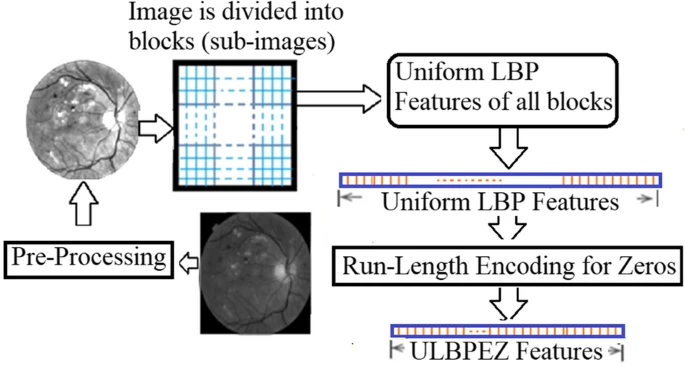

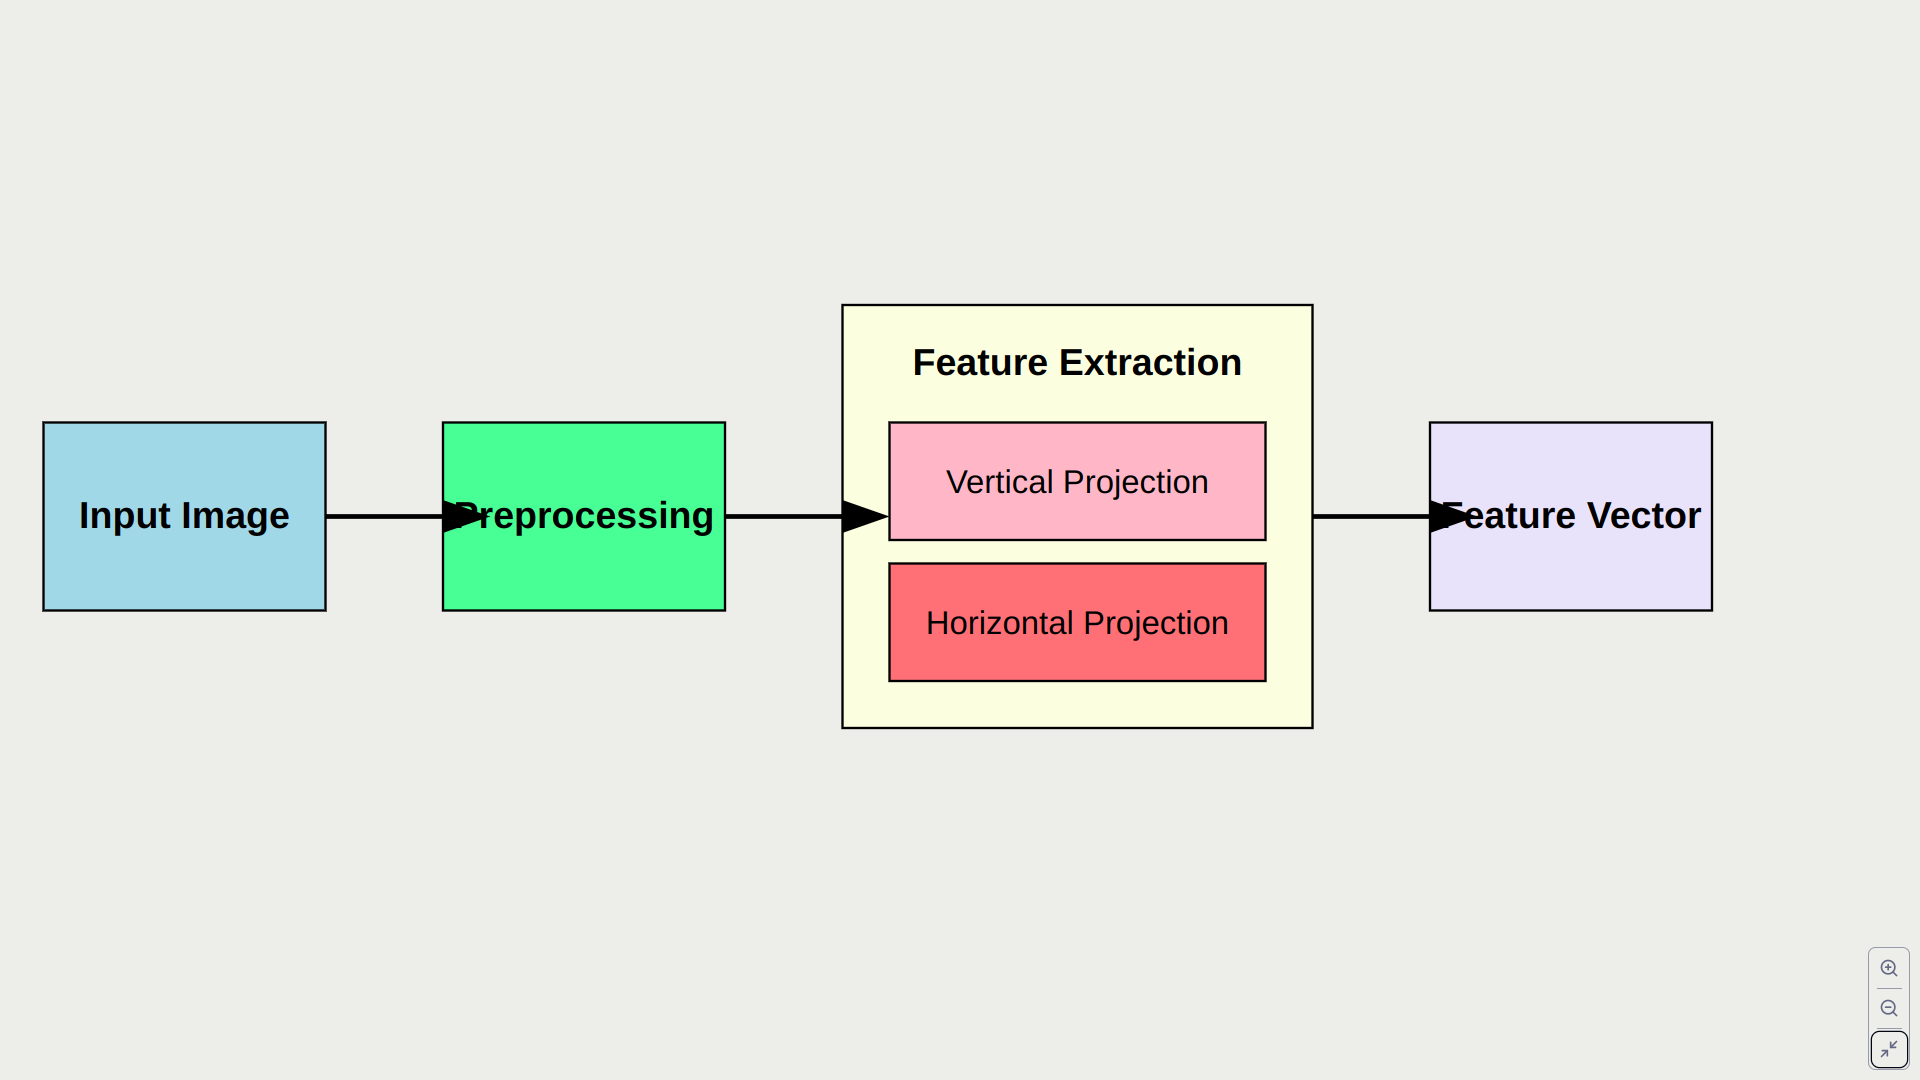

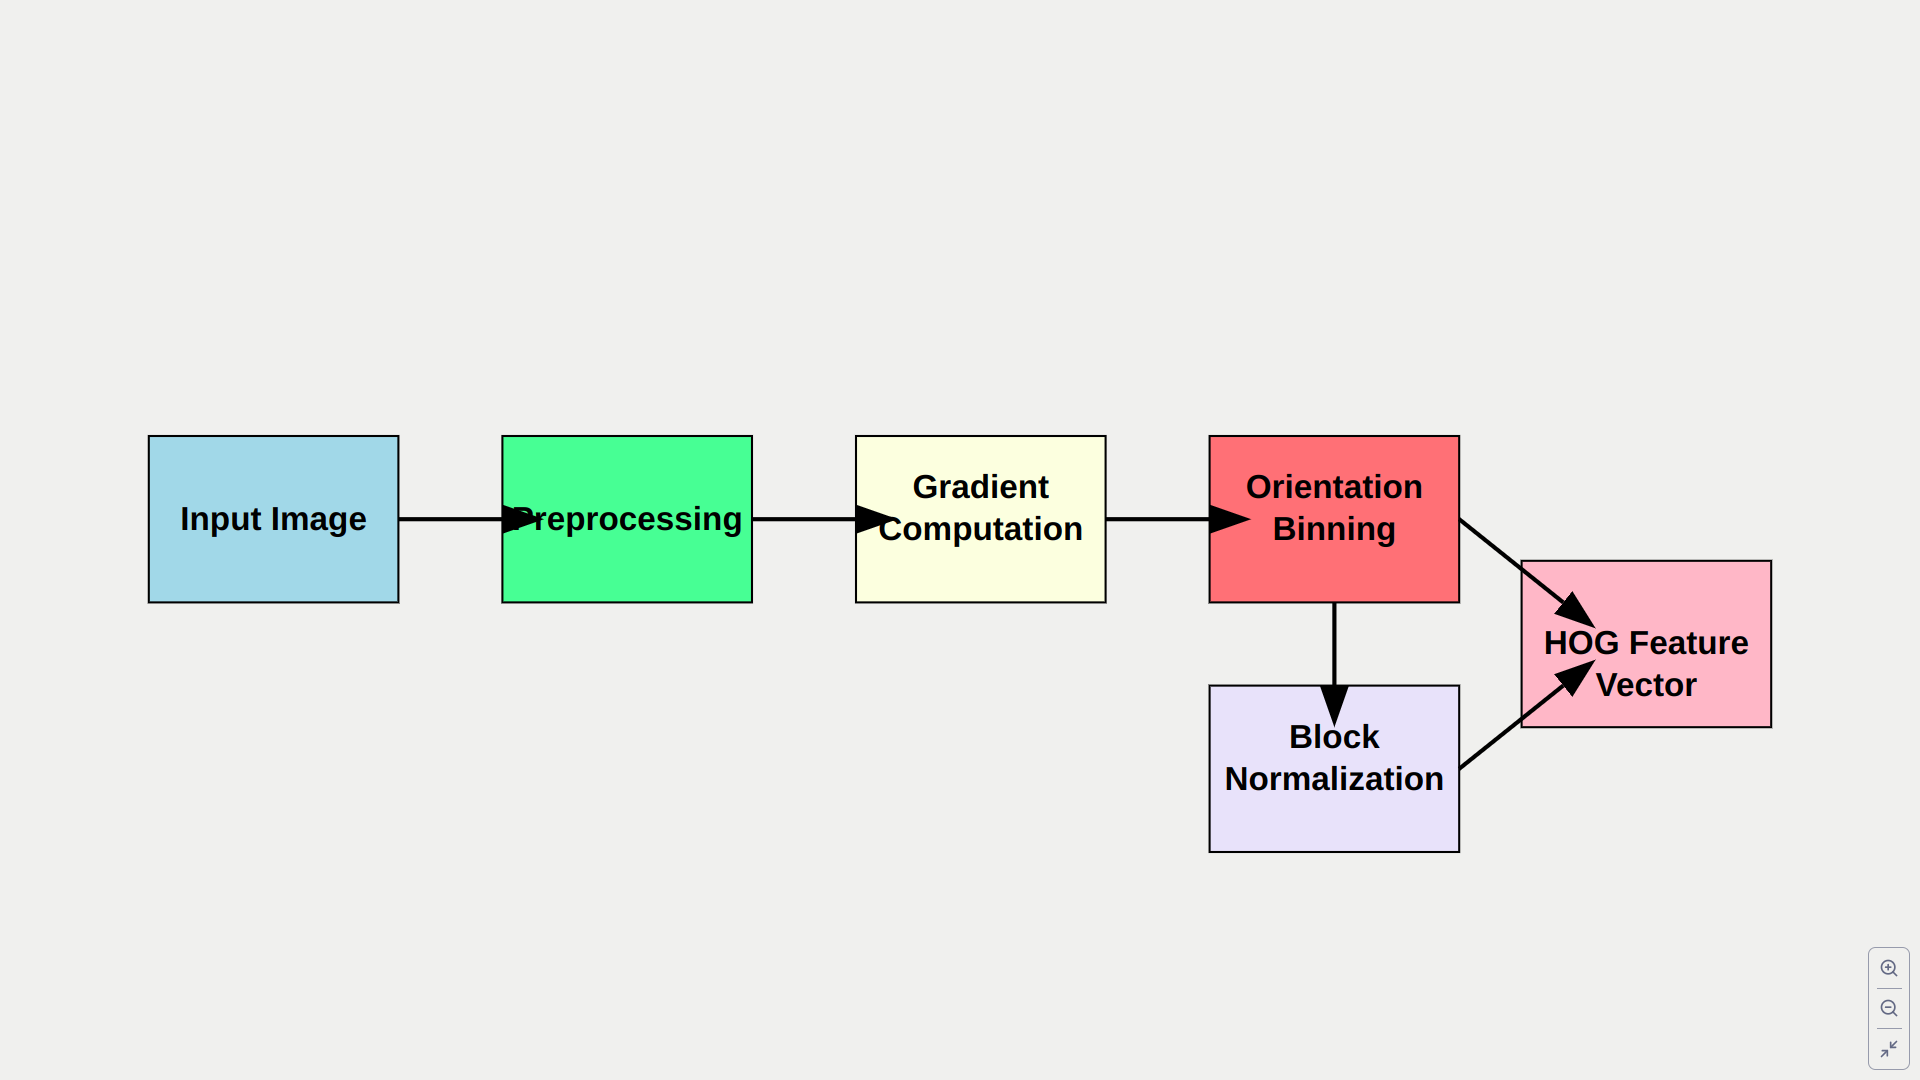

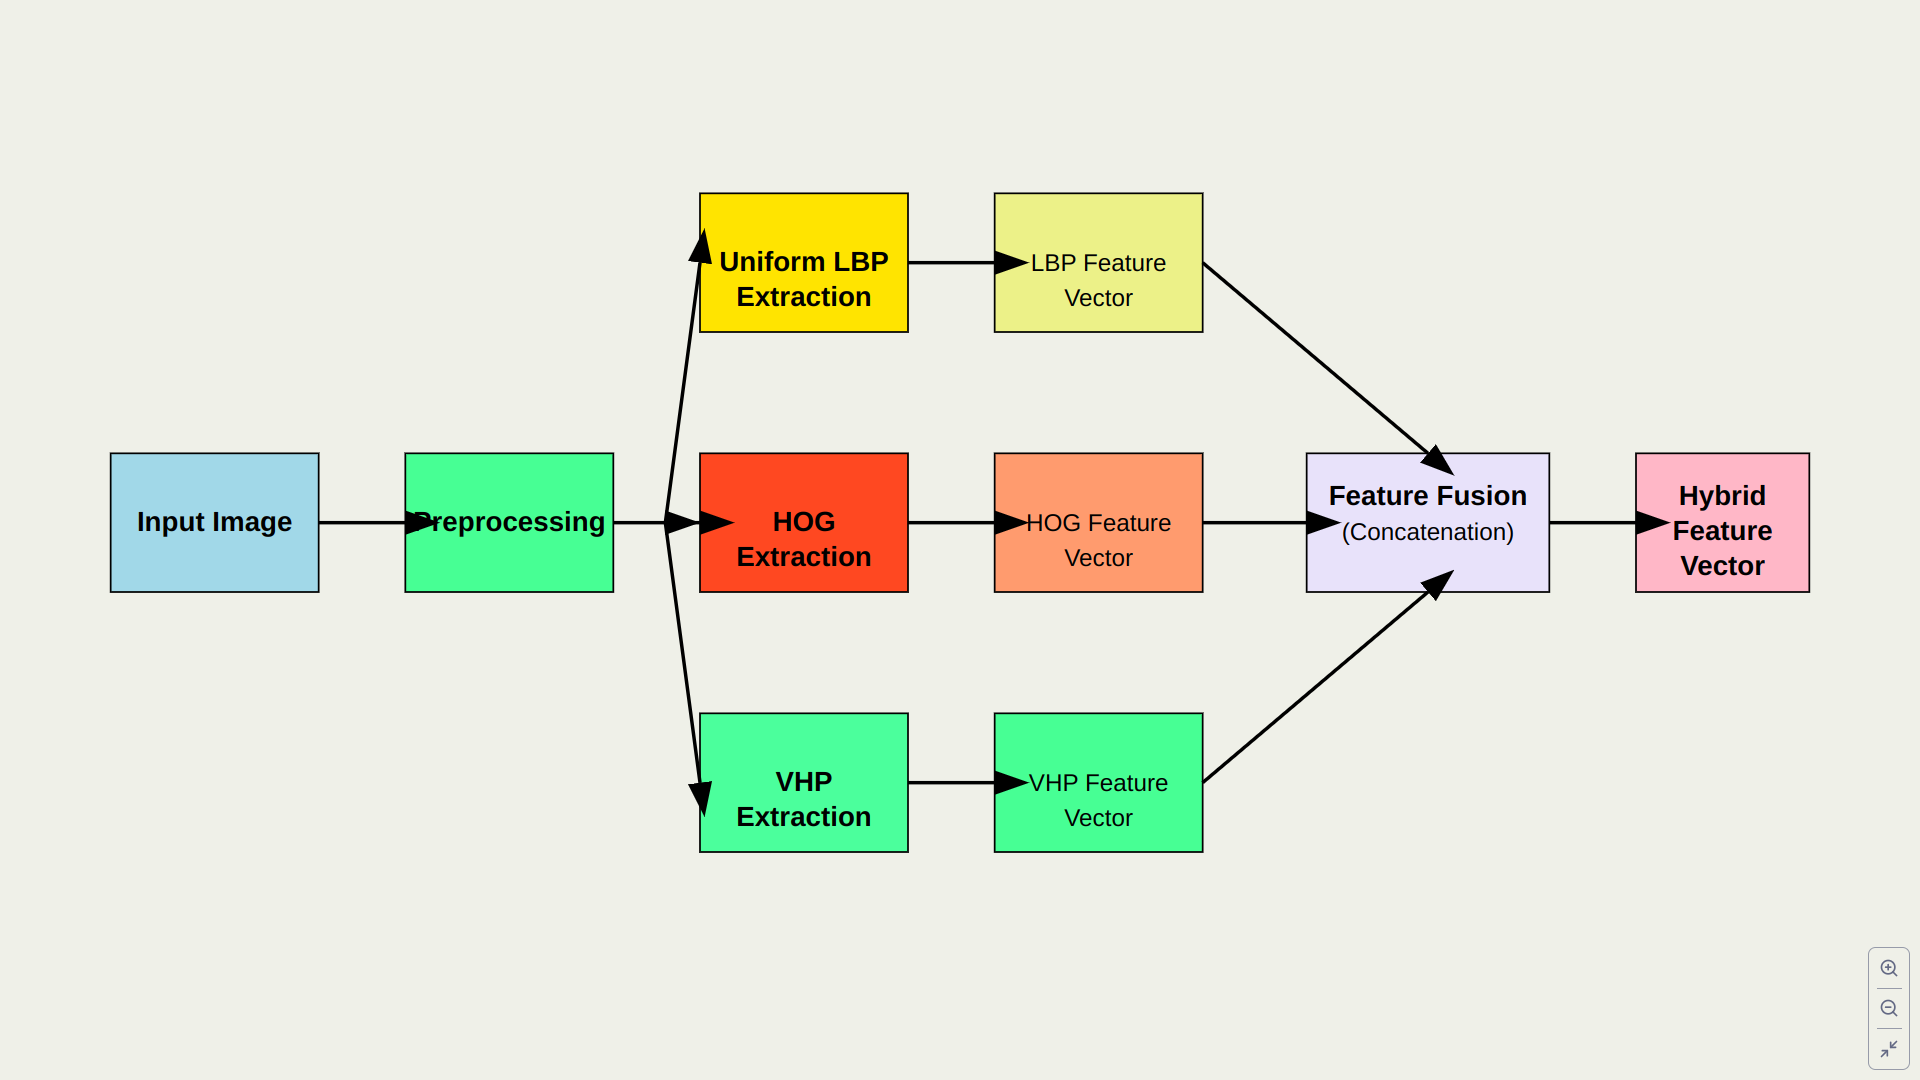